# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import seaborn as sns


df_two_classes = pd.read_csv('../lab2/task1_df.csv')

MSE train: 0.027, test: 0.027
R^2 train: 0.891, test: 0.892


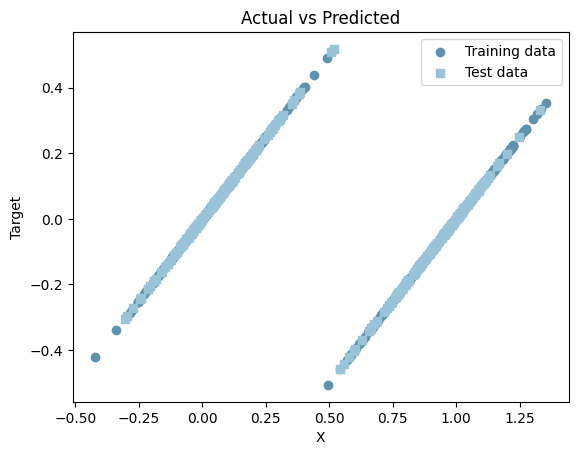

In [152]:
X = df_two_classes[['x', 'y']]  
y = df_two_classes['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE train: {mse_train:.3f}, test: {mse_test:.3f}')
print(f'R^2 train: {r2_train:.3f}, test: {r2_test:.3f}')


plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('X')
plt.ylabel('Target')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

k=1 99.86% (+/- 0.43)
k=2 99.86% (+/- 0.43)
k=3 99.86% (+/- 0.43)
k=4 99.86% (+/- 0.43)
k=5 99.86% (+/- 0.43)
k=6 99.86% (+/- 0.43)
k=7 99.71% (+/- 0.57)
k=8 99.71% (+/- 0.57)
k=9 99.86% (+/- 0.43)
k=10 99.86% (+/- 0.43)
k=11 99.86% (+/- 0.43)
k=12 99.71% (+/- 0.57)
k=13 99.71% (+/- 0.57)
k=14 99.71% (+/- 0.57)
k=15 99.71% (+/- 0.57)
k=16 99.71% (+/- 0.57)
k=17 99.86% (+/- 0.43)
k=18 99.86% (+/- 0.43)
k=19 99.86% (+/- 0.43)
k=20 99.86% (+/- 0.43)
k=21 99.86% (+/- 0.43)
k=22 99.86% (+/- 0.43)
k=23 99.86% (+/- 0.43)
k=24 99.86% (+/- 0.43)
The optimal number of neighbors is 1 with 99.86% accuracy
Accuracy on test data: 99.33%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       150
         1.0       0.99      1.00      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



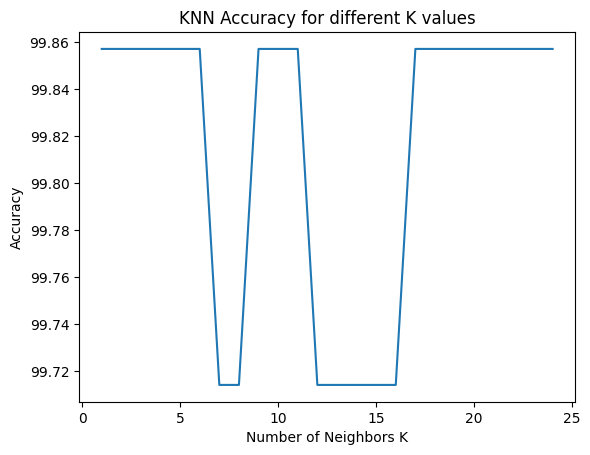

In [153]:
X = df_two_classes[['x', 'y']]  
y = df_two_classes['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neighbors = np.arange(1, 25)  
cv_scores = []
k_fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print(f"k={k} {scores.mean()*100:.2f}% (+/- {scores.std()*100:.2f})")


optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k} with {max(cv_scores):.2f}% accuracy")


knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print(f'Classification Report (test):')
print(classification_report(y_test, y_test_pred))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different K values')
plt.show()

In [154]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)

[[148   2]
 [  0 150]]
99.0


In [155]:
X = df_two_classes[['x', 'y']]  
y = df_two_classes['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print('Classification Report (test):')
print(classification_report(y_test, y_test_pred))

importances = rf.feature_importances_
feature_names = X.columns

Accuracy on test data: 99.00%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       150
         1.0       0.98      1.00      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



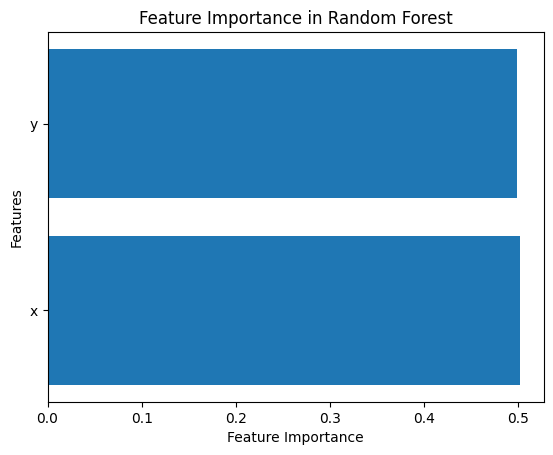

In [156]:

plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

**Аналіз отриманих результатів**:

1.   ...
2.   ...
3.   ...  



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [157]:
df_three_classes = pd.read_csv('../lab2/three_classes_sample.csv')
X = df_three_classes[['x', 'y']]  
y = df_three_classes['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print('Classification Report (test):')
print(classification_report(y_test, y_test_pred))

importances = rf.feature_importances_
feature_names = X.columns

Accuracy on test data: 98.15%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        83
         1.0       0.99      0.96      0.98       111
         2.0       0.96      1.00      0.98        76

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



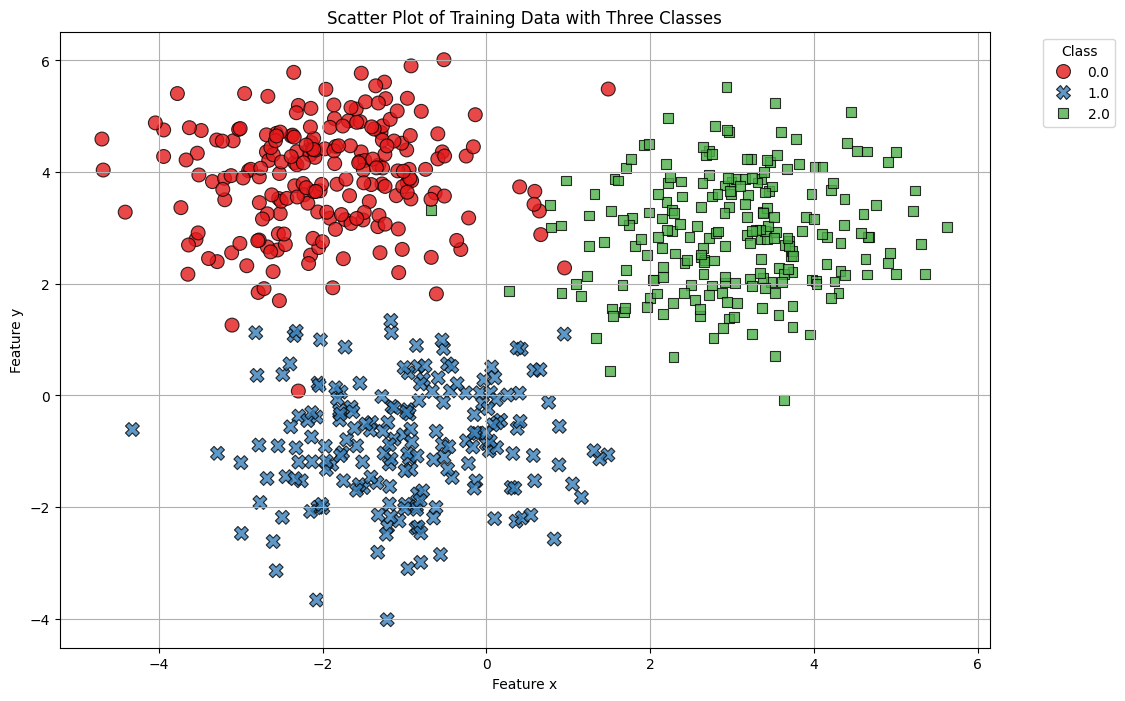

In [158]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x=X_train['x'], y=X_train['y'], hue=y_train, palette='Set1', style=y_train, s=100, alpha=0.8, edgecolor='k')

plt.title('Scatter Plot of Training Data with Three Classes')
plt.xlabel('Feature x')
plt.ylabel('Feature y')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [159]:
# code

In [160]:
# code

In [161]:
# code

**Аналіз отриманих результатів**:

1.   ...
2.   ...
3.   ...  



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [162]:
# code

In [163]:
# code

In [164]:
# code

In [165]:
# code

In [166]:
# code

**Аналіз отриманих результатів**:

1.   ...
2.   ...
3.   ...  

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [167]:
# code

In [168]:
# code

In [169]:
# code

In [170]:
# code

In [171]:
# code

**Аналіз отриманих результатів**:

1.   ...
2.   ...
3.   ...  